#Prediction of California House Price

In [ ]:
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as pl
%matplotlib inline

FIGSIZE = (11, 7)

cal_housing = fetch_california_housing()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

In [24]:
import pandas as pd
X_df = pd.DataFrame(data=X_train, columns=names)
X_df['MedHouseVal'] = y_train
X_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.1908,52,5.000000,1.014184,879,3.117021,37.71,-122.43,2.556
1,3.6094,42,4.900990,0.957096,971,3.204620,37.95,-122.35,1.146
2,2.6250,16,8.333333,1.666667,20,3.333333,37.90,-121.24,1.375
3,1.5143,34,3.805981,1.149526,3538,2.580598,34.02,-118.35,1.188
4,7.3356,38,5.894904,1.057325,750,2.388535,33.89,-118.39,4.227


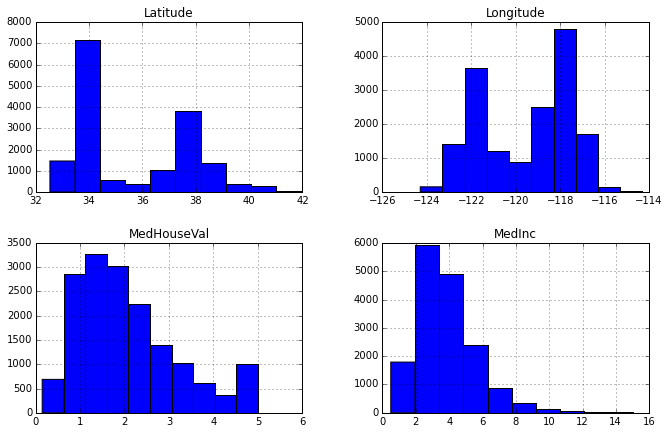

In [25]:
X_df['MedHouseVal'] = y_train
_ = X_df.hist(column=['Latitude', 'Longitude', 'MedInc', 'MedHouseVal'], figsize=FIGSIZE)

In [ ]:
import time
from collections import defaultdict
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

res = defaultdict(dict)

def benchmark(est, name=None):
    if not name:
        name = est.__class__.__name__
    t0 = time.clock()
    est.fit(X_train, y_train)
    res[name]['train_time'] = time.clock() - t0
    t0 = time.clock()
    pred = est.predict(X_test)
    res[name]['test_time'] = time.clock() - t0
    res[name]['MAE'] = mean_absolute_error(y_test, pred)
    return est
    
benchmark(DummyRegressor())
benchmark(Ridge(alpha=0.0001, normalize=True))
benchmark(Pipeline([('std', StandardScaler()), 
                    ('svr', SVR(kernel='rbf', C=10.0, gamma=0.1, tol=0.001))]), name='SVR')
benchmark(RandomForestRegressor(n_estimators=100, max_features=5, random_state=0, 
                                bootstrap=False, n_jobs=4))
est = benchmark(GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.1,
                                          loss='huber', min_samples_leaf=3, 
                                          random_state=0))

res_df = pd.DataFrame(data=res).T
res_df[['train_time', 'test_time', 'MAE']].sort('MAE', ascending=False)